In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
clf = DecisionTreeClassifier()

## RandomizedSearchCV

In [6]:
param_distributions = {
    "max_depth": [3, None],
    "max_features": range(1, 11),
    "min_samples_split": range(2, 11),
    "criterion": ['gini', 'entropy'],
}

In [7]:
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=10, cv=5)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [8]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                       min_samples_split=6)

In [9]:
random_search.best_params_

{'min_samples_split': 6,
 'max_features': 10,
 'max_depth': 3,
 'criterion': 'entropy'}

In [10]:
random_search.best_score_

0.947259742276044

In [11]:
random_search.cv_results_

{'mean_fit_time': array([0.00259581, 0.00244312, 0.00187278, 0.00113173, 0.00156803,
        0.00129471, 0.00282693, 0.00179367, 0.00245743, 0.00268984]),
 'std_fit_time': array([1.99057761e-04, 8.89821322e-05, 5.87803105e-05, 8.39980021e-05,
        5.51672772e-05, 4.67688536e-05, 2.40155900e-04, 3.97478596e-05,
        8.00145539e-05, 1.40071270e-04]),
 'mean_score_time': array([0.00097885, 0.00084496, 0.00080304, 0.0008203 , 0.00083985,
        0.00080242, 0.00087252, 0.00084548, 0.00081887, 0.00085163]),
 'std_score_time': array([1.22260768e-04, 5.64964505e-05, 3.51834742e-05, 5.61202290e-05,
        4.91770555e-05, 3.83667575e-05, 4.25651888e-05, 4.79197383e-05,
        3.12587034e-05, 6.87285959e-05]),
 'param_min_samples_split': masked_array(data=[6, 6, 8, 9, 4, 2, 4, 5, 9, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_max_features': masked_array(data=[10, 8, 5, 1, 4, 1, 10, 

## GridSearchCV

In [12]:
param_grid = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "criterion": ["gini", "entropy"],
}

In [13]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [14]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_split=3)

In [15]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_split': 3}

In [16]:
grid_search.best_score_

0.943797546964757

## Descision Tree

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
better_model = DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=None, 
                                      max_features=3, 
                                      min_samples_split=2)
better_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=3)

In [19]:
y_pred = better_model.predict(X_test)

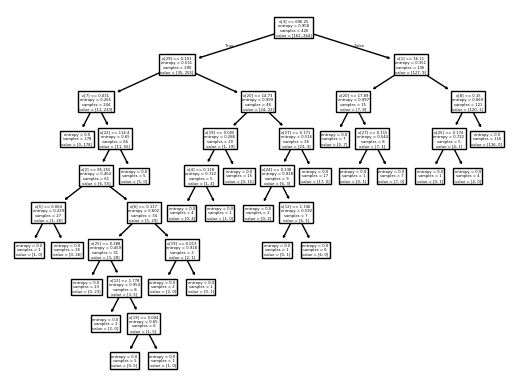

In [20]:
tree.plot_tree(better_model)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
accuracy_score(y_test, y_pred)

0.9090909090909091

In [23]:
confusion_matrix(y_test, y_pred)

array([[43,  7],
       [ 6, 87]])